<h1 align="center">MILESTONE 2 SALES</h1>
<center><i>Devan Setya Putra<i></center>
<center><i>HCK 004 Phase 1<i></center>

<center><i>US Stores Sales Between 2010 and 2011<i></center>
    
**Dataset: [US Stores Sales](https://www.kaggle.com/datasets/dsfelix/us-stores-sales)**

----

# >📝 Problem

Terdapat data store, store ingin mengetahui apa yang harus dia lakukan kedepannya. Apa yang harus dilakukan agar profit meningkat?.

----

# 📁 File Descriptions



> **sales.csv** - Data ini merupakan data dari suatu store, data ini berisi berbagai column seperti are store, apa yang dijual, berapa pengeluan, penjualan, ptofit dan lain sebagainya.

----

# ❓ Variables



> **Area Code** - Kode toko;

> **State** - Negara bagian tempat toko berada;

> **Market** - Wilayah tempat toko berada;

> **Market Size** - Ukuran toko;

> **Profit** - Keuntungan dalam dollar ($) `(this the target)`;;

> **Margin** - Keuntungan + total biaya $ atau Penjualan - COGS (dalam dolar);

> **Sales** - Nilai penjualan ($)

> **COGS** - Biaya barang terjual ($);

> **Total Expenses** - Total biaya untuk mendapatkan produk yang dijual ($);

> **Marketing** - Biaya pemasaran ($);

> **Inventory** - Nilai persediaan produk pada saat penjualan ($);

> **Budget Profit** - Keuntungan yang diharapkan ($);

> **Budget COGS** - Biaya barang terjual yang diharapkan ($);

> **Budget Margin** - Keuntungan yang diharapkan + Total biaya yang diharapkan (dalam dolar) atau Penjualan yang diharapkan - Biaya barang terjual yang diharapkan ($);

> **Budget Sales** - Nilai penjualan yang diharapkan ($);

> **ProductID** - ID produk;

> **Date** - Tanggal penjualan;

> **Product Type** - Kategori produk;

> **Product** - Deskripsi produk;

> **Type** - Tipe produk.

----

# 🎯 Goals



> **Goal :** Prediksi profit dan mengetahui column mana yang paling berpengaruh besar.



----

# 📚 Library

-----


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
import scipy.stats as stats
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import  MinMaxScaler, OrdinalEncoder
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error,r2_score
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor


#Model Saving
import joblib

# Display
pd.options.display.max_columns = None



----
# 📊 Loading Data
----

In [2]:
# read CSV untuk memanggil data csv, dan missing value untuk memastikan bahwa tidak ada lagi uniq missing value
missing_values = ["n/a", "na", "--",' ?', 'inf']
data=pd.read_csv("sales.csv", na_values = missing_values, skipinitialspace=True)
df= data.copy()
df.head(10) #melihat 10 data pertama

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular
5,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1139.0,90.0,80.0,130.0,210.0,2,08/01/11 00:00:00,Coffee,Columbian,Regular
6,203,Connecticut,East,Small Market,135.0,155.0,275.0,103.0,64.0,33.0,1130.0,110.0,90.0,150.0,240.0,2,09/01/11 00:00:00,Coffee,Columbian,Regular
7,203,Connecticut,East,Small Market,171.0,188.0,334.0,125.0,73.0,41.0,1119.0,130.0,100.0,160.0,260.0,2,10/01/11 00:00:00,Coffee,Columbian,Regular
8,203,Connecticut,East,Small Market,181.0,195.0,346.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/11 00:00:00,Coffee,Columbian,Regular
9,203,Connecticut,East,Small Market,15.0,31.0,51.0,20.0,16.0,5.0,804.0,20.0,20.0,30.0,50.0,13,06/01/10 00:00:00,Tea,Green Tea,Regular


In [3]:
# Melihat 10 nilai terakhir
df.tail(10)

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
4238,985,Louisiana,South,Small Market,62.0,107.0,206.0,86.0,65.0,32.0,484.0,40.0,80.0,100.0,180.0,9,02/01/11 00:00:00,Herbal Tea,Lemon,Decaf
4239,985,Louisiana,South,Small Market,43.0,93.0,167.0,76.0,58.0,28.0,613.0,40.0,70.0,90.0,160.0,9,07/01/11 00:00:00,Herbal Tea,Lemon,Decaf
4240,985,Louisiana,South,Small Market,37.0,83.0,160.0,67.0,58.0,25.0,599.0,30.0,60.0,80.0,140.0,9,09/01/11 00:00:00,Herbal Tea,Lemon,Decaf
4241,985,Louisiana,South,Small Market,1.0,87.0,150.0,63.0,86.0,57.0,37.0,0.0,50.0,70.0,120.0,4,04/01/10 00:00:00,Espresso,Caffe Latte,Regular
4242,985,Louisiana,South,Small Market,3.0,90.0,154.0,64.0,87.0,58.0,-113.0,10.0,50.0,80.0,130.0,4,05/01/10 00:00:00,Espresso,Caffe Latte,Regular
4243,985,Louisiana,South,Small Market,-6.0,66.0,113.0,47.0,72.0,42.0,-395.0,0.0,40.0,50.0,90.0,4,07/01/10 00:00:00,Espresso,Caffe Latte,Regular
4244,985,Louisiana,South,Small Market,-7.0,61.0,105.0,44.0,68.0,39.0,-508.0,10.0,30.0,60.0,90.0,4,08/01/10 00:00:00,Espresso,Caffe Latte,Regular
4245,985,Louisiana,South,Small Market,-3.0,76.0,131.0,55.0,79.0,49.0,-1053.0,0.0,40.0,60.0,100.0,4,12/01/10 00:00:00,Espresso,Caffe Latte,Regular
4246,985,Louisiana,South,Small Market,1.0,87.0,160.0,63.0,86.0,57.0,37.0,0.0,50.0,70.0,120.0,4,04/01/11 00:00:00,Espresso,Caffe Latte,Regular
4247,985,Louisiana,South,Small Market,4.0,90.0,153.0,64.0,81.0,58.0,-113.0,10.0,50.0,80.0,130.0,4,05/01/11 00:00:00,Espresso,Caffe Latte,Regular


In [4]:
# untuk melihat info apakah masih ada data string atau tidak
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4248 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4248 non-null   object 
 4   Profit          4248 non-null   float64
 5   Margin          4248 non-null   float64
 6   Sales           4248 non-null   float64
 7   COGS            4248 non-null   float64
 8   Total Expenses  4248 non-null   float64
 9   Marketing       4248 non-null   float64
 10  Inventory       4248 non-null   float64
 11  Budget Profit   4248 non-null   float64
 12  Budget COGS     4248 non-null   float64
 13  Budget Margin   4248 non-null   float64
 14  Budget Sales    4248 non-null   float64
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o

In [5]:
num =['Area Code', 'Profit', 'Margin', 'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory', 
      'Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales', 'ProductId']
cat = ['State', 'Market', 'Market Size', 'Product Type', 'Product', 'Type']

```Dari Data diatas dapat kita perhatian bahwa terdapat 7 data objek dan 2 int, sisanya float (11)```

----
# 🧹Cleaning Data

---

In [6]:
# untuk melihat apakah masih ada data missing value pada dataframe (Tidak ada nilai missing pada data)
df.isnull().sum()

Area Code         0
State             0
Market            0
Market Size       0
Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
ProductId         0
Date              0
Product Type      0
Product           0
Type              0
dtype: int64

In [7]:
# untuk melihat apakah terdapat data duplicate  (Tidak ada Duplicate data)
df[df.duplicated(keep=False)] 

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type


In [8]:
# code ini untuk melihat macam-macam dari nilai uniq yang ada di setiap kolom
for i in df.columns:
  print('Value Variabel {} is {}'.format(i,df[i].unique()))

Value Variabel Area Code is [203 206 209 210 212 213 214 216 217 224 225 234 239 253 254 262 281 303
 305 309 310 312 314 315 318 319 321 323 325 330 337 339 347 351 352 360
 361 386 405 407 408 409 413 414 415 417 419 425 430 432 435 440 469 475
 503 504 505 508 509 510 512 513 515 516 518 530 541 559 561 562 563 567
 573 580 585 603 607 608 614 617 618 619 626 630 631 636 641 646 650 660
 661 682 702 707 708 712 713 714 715 716 718 719 720 727 740 754 760 772
 773 774 775 781 786 801 805 806 813 815 816 817 818 830 831 832 845 847
 850 857 858 860 863 903 904 909 914 915 916 917 918 920 925 936 937 940
 941 949 951 954 956 959 970 971 972 978 979 985]
Value Variabel State is ['Connecticut' 'Washington' 'California' 'Texas' 'New York' 'Ohio'
 'Illinois' 'Louisiana' 'Florida' 'Wisconsin' 'Colorado' 'Missouri' 'Iowa'
 'Massachusetts' 'Oklahoma' 'Utah' 'Oregon' 'New Mexico' 'New Hampshire'
 'Nevada']
Value Variabel Market is ['East' 'West' 'South' 'Central']
Value Variabel Market Size is

In [9]:
# sedangkan ini untuk melihat berapa jumlah uniq value ditiap kolom
for i in df.columns:
  print('total variation {} as much {}'.format(i,df[i].nunique()))

total variation Area Code as much 156
total variation State as much 20
total variation Market as much 4
total variation Market Size as much 2
total variation Profit as much 466
total variation Margin as much 290
total variation Sales as much 432
total variation COGS as much 173
total variation Total Expenses as much 156
total variation Marketing as much 102
total variation Inventory as much 610
total variation Budget Profit as much 76
total variation Budget COGS as much 41
total variation Budget Margin as much 76
total variation Budget Sales as much 89
total variation ProductId as much 13
total variation Date as much 24
total variation Product Type as much 4
total variation Product as much 13
total variation Type as much 2


In [10]:
# sedangkan ini untuk melihat kolom apa saja yang uniq valuenya dibawah 20
for i in df.columns:
  if len(df[i].unique()) <= 20 :
    print(df[i].name)
    print(df[i].unique())
  else:
    continue

State
['Connecticut' 'Washington' 'California' 'Texas' 'New York' 'Ohio'
 'Illinois' 'Louisiana' 'Florida' 'Wisconsin' 'Colorado' 'Missouri' 'Iowa'
 'Massachusetts' 'Oklahoma' 'Utah' 'Oregon' 'New Mexico' 'New Hampshire'
 'Nevada']
Market
['East' 'West' 'South' 'Central']
Market Size
['Small Market' 'Major Market']
ProductId
[ 2 13  5  6  9 10 11  3  8 12  4  1  7]
Product Type
['Coffee' 'Tea' 'Espresso' 'Herbal Tea']
Product
['Columbian' 'Green Tea' 'Caffe Mocha' 'Decaf Espresso' 'Lemon' 'Mint'
 'Darjeeling' 'Decaf Irish Cream' 'Chamomile' 'Earl Grey' 'Caffe Latte'
 'Amaretto' 'Regular Espresso']
Type
['Regular' 'Decaf']


----

# 🔍 Exploratory Analysis

----

In [11]:
# Mengubah bentuk data menjadi Datetime untuk kolom date
df['Date']=pd.to_datetime(df['Date'])

In [12]:
# Deskripsi dari setiap column nominal
df.describe()

,Area Code,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,582.278013,61.097693,104.293315,192.987524,84.433145,54.063559,31.185028,749.381356,60.913371,74.830508,100.819209,175.649718,6.887006
std,221.140310,101.708546,94.342522,151.133127,67.249769,32.352598,27.023264,661.031896,79.546123,66.238145,92.602725,148.891522,3.664072
min,203.000000,-638.000000,-302.000000,17.000000,0.000000,10.000000,0.000000,-3534.000000,-320.000000,0.000000,-210.000000,0.000000,1.000000
25%,417.000000,17.000000,52.750000,100.000000,43.000000,33.000000,13.000000,432.000000,20.000000,30.000000,50.000000,80.000000,4.000000
50%,573.000000,40.000000,76.000000,138.000000,60.000000,46.000000,22.000000,619.000000,40.000000,50.000000,70.000000,130.000000,6.000000
75%,772.000000,92.000000,132.000000,230.000000,100.000000,65.000000,39.000000,910.500000,80.000000,90.000000,130.000000,210.000000,10.000000
max,985.000000,778.000000,613.000000,912.000000,364.000000,190.000000,156.000000,8252.000000,560.000000,450.000000,690.000000,1140.000000,13.000000


Dilihat dari statistik data, terdapat beberapa hal yang perlu diperhatikan:

> - Nilai minimal pada fitur Inventory adalah negatif. Hal ini sebenarnya tidak mungkin terjadi, karena pada saat stok barang sama dengan nol, pasar seharusnya tidak memiliki produk secara fisik untuk dijual. Oleh karena itu, perlu dilakukan transformasi data kecil untuk mengubah semua nilai negatif pada fitur Inventory menjadi nol.

> - Standar deviasi pada fitur Sales sangat tinggi karena terdapat perbedaan yang cukup besar antara nilai 75% dan max. Perbedaan tersebut mencapai 930,00 dollar. Oleh karena itu, perlu dilakukan tindakan untuk mengatasi hal ini agar tidak menjadi masalah di masa depan.

> - Data standarisasi diperlukan karena nilai maksimum pada fitur Product ID adalah 13, sedangkan nilai minimum pada fitur Area adalah 203,00. Jika tidak dilakukan standarisasi data, model machine learning dapat mempelajari bahwa fitur Area lebih penting daripada Product ID hanya karena nilai nya lebih tinggi. Dengan menerapkan data standarisasi, masalah standar deviasi yang tinggi juga dapat diatasi.

Oleh karena itu, untuk saat ini fokus dilakukan untuk mengubah semua nilai negatif pada fitur Inventory menjadi nol.

In [13]:
# Converting all negative values of inventory to zero
df['Inventory'] = df['Inventory'].apply(lambda x: x if x >= 0 else 0)
df.describe()

,Area Code,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,582.278013,61.097693,104.293315,192.987524,84.433145,54.063559,31.185028,769.115348,60.913371,74.830508,100.819209,175.649718,6.887006
std,221.140310,101.708546,94.342522,151.133127,67.249769,32.352598,27.023264,610.080105,79.546123,66.238145,92.602725,148.891522,3.664072
min,203.000000,-638.000000,-302.000000,17.000000,0.000000,10.000000,0.000000,0.000000,-320.000000,0.000000,-210.000000,0.000000,1.000000
25%,417.000000,17.000000,52.750000,100.000000,43.000000,33.000000,13.000000,432.000000,20.000000,30.000000,50.000000,80.000000,4.000000
50%,573.000000,40.000000,76.000000,138.000000,60.000000,46.000000,22.000000,619.000000,40.000000,50.000000,70.000000,130.000000,6.000000
75%,772.000000,92.000000,132.000000,230.000000,100.000000,65.000000,39.000000,910.500000,80.000000,90.000000,130.000000,210.000000,10.000000
max,985.000000,778.000000,613.000000,912.000000,364.000000,190.000000,156.000000,8252.000000,560.000000,450.000000,690.000000,1140.000000,13.000000


In [14]:
# Deskripsi dari column objek
df.describe(include='object')

,State,Market,Market Size,Product Type,Product,Type
count,4248,4248,4248,4248,4248,4248
unique,20,4,2,4,13,2
top,Utah,West,Small Market,Espresso,Columbian,Regular
freq,288,1344,2544,1176,480,2400


Dari Data diatas: 

> Terdapat empat market yang terdistribusi di dua puluh negara bagian.

> Selain itu, kita juga bekerja dengan dua market size: small dan large.


In [15]:
# Deskripsi dari column Date
df.describe(include='datetime')

/var/folders/kt/0jyjyc0j4x55lktsjdv8ch3w0000gn/T/ipykernel_24825/933505282.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='datetime')


,Date
count,4248
unique,24
top,2010-04-01 00:00:00
freq,177
first,2010-01-01 00:00:00
last,2011-12-01 00:00:00


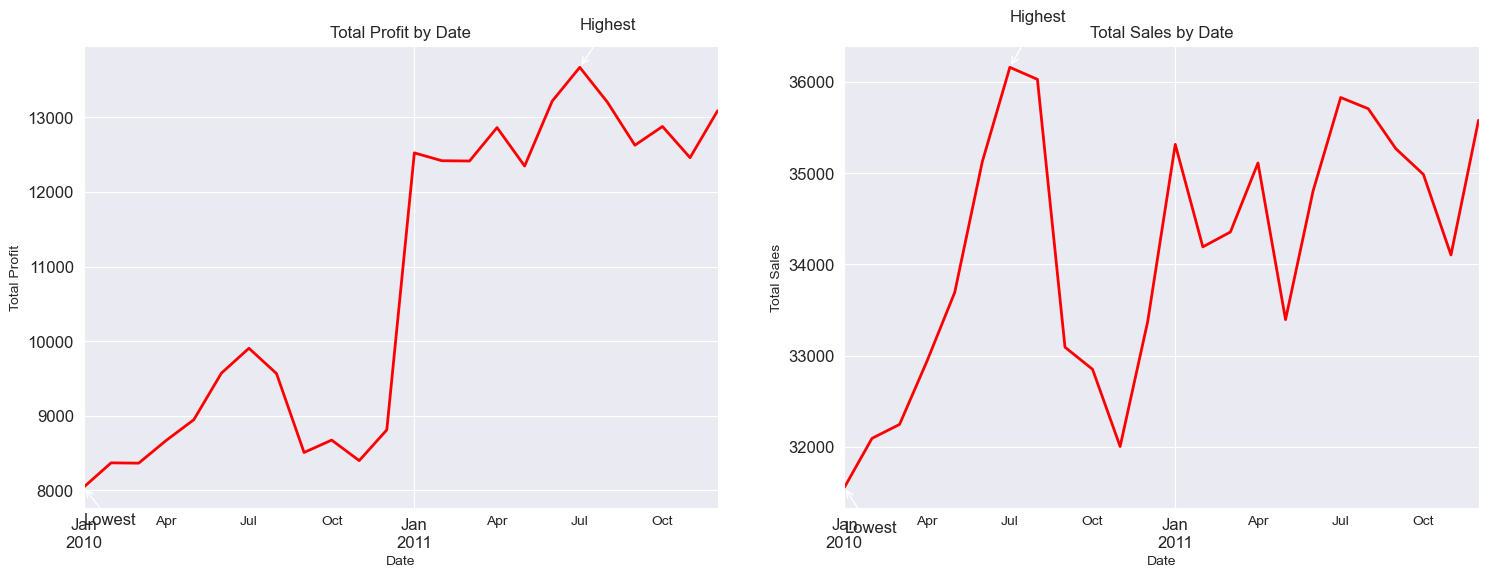

In [16]:
sns.set_style('darkgrid')

fig, axes = plt.subplots(ncols=2, figsize=(18, 6))

for i, col in enumerate(['Profit', 'Sales']):
    df.groupby('Date')[col].sum().plot(kind='line', ax=axes[i], color='red', linewidth=2)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(f'Total {col}')
    axes[i].set_title(f'Total {col} by Date')
    axes[i].tick_params(axis='both', which='major', labelsize=12)

    max_date = df.groupby('Date')[col].sum().idxmax()
    min_date = df.groupby('Date')[col].sum().idxmin()
    max_val = df.groupby('Date')[col].sum().max()
    min_val = df.groupby('Date')[col].sum().min()

    axes[i].annotate('Highest', xy=(max_date, max_val), xytext=(max_date, max_val+500),
                arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)
    axes[i].annotate('Lowest', xy=(min_date, min_val), xytext=(min_date, min_val-500),
                arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

plt.show()


> Dari plot line diatas dapat diperhatikan 2 hal yang menjadi perhatian atau goals dari berbagai usaha. ada yang ingin fokus pada penjualan, ada juga yang ingin fokus pada pendapatan. Namun pada kali ini, yang akan dibahas adalah `PROFIT`.

> `Kenapa?`
    Karena jika diperhatian dari plot diatas, penjualan banyak bukan berarti banyak untung, bisa saja saat itu memanga ada banyak diskon atau ada hal lainnya. oleh karena itu tidak membuat highest sales menjadi highest profit. namun untuk meningkat kan sales baik untuk memperkenalkan store, namun jika ingin perusahaan tetap beroprasi dengan baik perlu melihat profitabilitynya agar tetap dalam keuangan yang sehat.

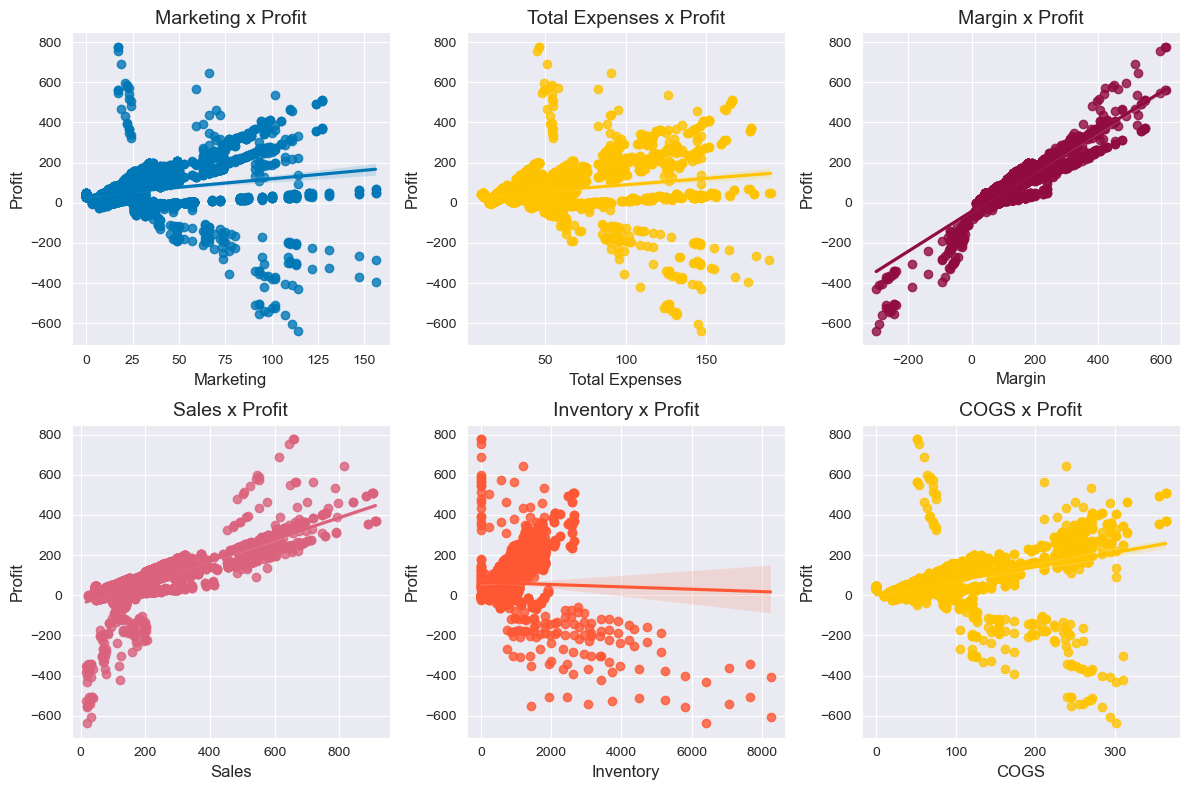

In [17]:
plt.figure(figsize=(12, 8))

# Set a cool color palette
colors = ['#0077B6', '#FFC300', '#900C3F', '#DA627D', '#FF5733', '#FFC300']

# Plot each variable against Profit
vars = ['Marketing', 'Total Expenses', 'Margin', 'Sales', 'Inventory', 'COGS']
for i, var in enumerate(vars):
    plt.subplot(2, 3, i+1)
    sns.regplot(data=df, x=var, y='Profit', color=colors[i])
    plt.title(f'{var} x Profit', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Profit', fontsize=12)

plt.tight_layout()
plt.show()


> Dapat dilihat daro pola data column numeric, yang memiliki pola linear dari data-data tersebut adalah Margin dan Sales sedangkan yang lain memiliki nilai linear yang kecil.

In [18]:
col=['Area Code', 'State', 'Market', 'Market Size', 'Profit', 'Margin',
       'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory',
       'Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales',
       'ProductId', 'Date', 'Product Type', 'Product', 'Type']
num= ['Area Code', 'Profit', 'Margin',
       'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory',
       'Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales',
       'ProductId', 'Date']
cat= ['State','Market','Market Size','Product Type','Product','Type']

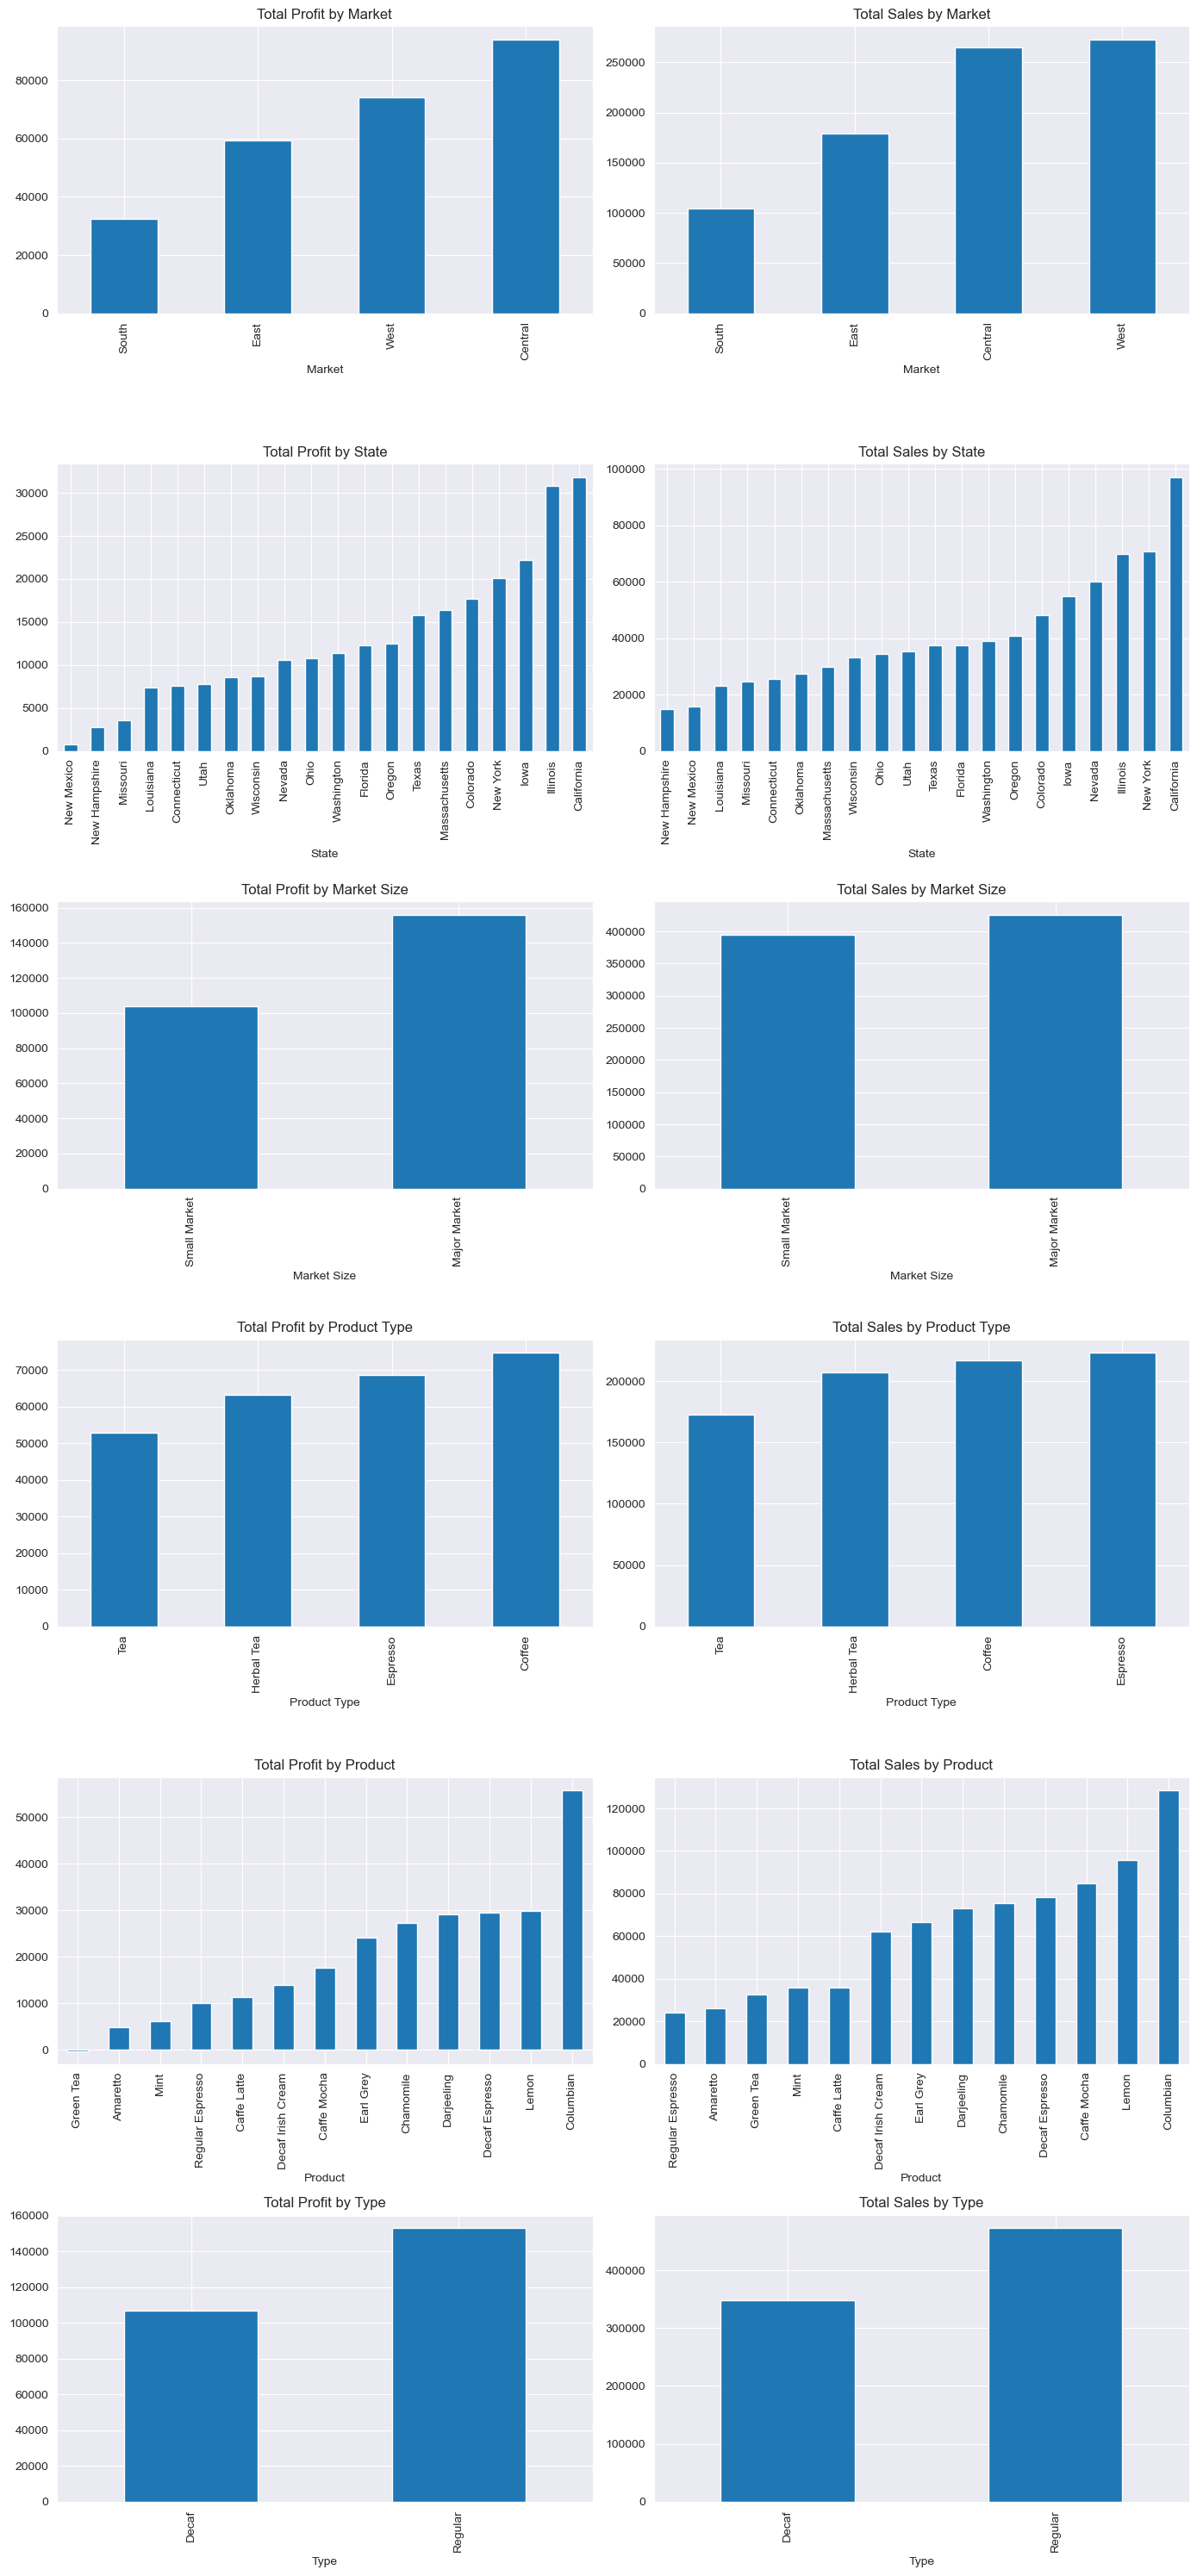

In [19]:
fig, axes = plt.subplots(ncols=2, nrows=6, figsize=(14, 30))

df.groupby('Market')['Profit'].sum().sort_values().plot(kind='bar', ax=axes[0][0])
df.groupby('Market')['Sales'].sum().sort_values().plot(kind='bar', ax=axes[0][1])
df.groupby('State')['Profit'].sum().sort_values().plot(kind='bar', ax=axes[1][0] )
df.groupby('State')['Sales'].sum().sort_values().plot(kind='bar', ax=axes[1][1] )
df.groupby('Market Size')['Profit'].sum().sort_values().plot(kind='bar', ax=axes[2][0])
df.groupby('Market Size')['Sales'].sum().sort_values().plot(kind='bar', ax=axes[2][1])
df.groupby('Product Type')['Profit'].sum().sort_values().plot(kind='bar', ax=axes[3][0])
df.groupby('Product Type')['Sales'].sum().sort_values().plot(kind='bar', ax=axes[3][1])
df.groupby('Product')['Profit'].sum().sort_values().plot(kind='bar', ax=axes[4][0])
df.groupby('Product')['Sales'].sum().sort_values().plot(kind='bar', ax=axes[4][1])
df.groupby('Type')['Profit'].sum().sort_values().plot(kind='bar', ax=axes[5][0])
df.groupby('Type')['Sales'].sum().sort_values().plot(kind='bar', ax=axes[5][1])

axes[0][0].set_title('Total Profit by Market')
axes[0][1].set_title('Total Sales by Market')
axes[1][0].set_title('Total Profit by State')
axes[1][1].set_title('Total Sales by State')
axes[2][0].set_title('Total Profit by Market Size')
axes[2][1].set_title('Total Sales by Market Size')
axes[3][0].set_title('Total Profit by Product Type')
axes[3][1].set_title('Total Sales by Product Type')
axes[4][0].set_title('Total Profit by Product')
axes[4][1].set_title('Total Sales by Product')
axes[5][0].set_title('Total Profit by Type')
axes[5][1].set_title('Total Sales by Type')

plt.tight_layout()
plt.show()


> Data diatas merupakan Perbandingan kolum category terhadap profit dan sales.

> Dapat dilihat dari market yang mana profit tertinggi berada pada market di central, namun untuk penjualan paling banyak berada di West

> Untuk state, state terbesar dari profit dan sales sama-sama california, namun untuk state kedua kota yang berbeda dari keduanya.

> Dari Market Size dapat dilihat bahwa profit paling besar berada pada major market, dan dapat dilihat dari segi profit sangat signifikan perbedaannya namun dari sisi sales tidak terlalu terlihat perbedaannya.

> Untuk dari sisi Profit, paling besar adalah dari penjualan kopi, namun dari sisi sales paling banyak adalah espresso

> Untuk jenis product nya dapat dilihat, Profit dari Green tea sangatlah kecil namun salesnya sangat banyak, ini mengindikasikan bahwa produk sedang dijual murah sehingga penjualan banyak dan profit kecil (ini baik untuk memperkanalkan produk)

> Untuk type, keduanya tidak memiliki perbedaan yang signifikan

# ⚙️ Feature Engineering

Sebelum masuk pemodelan, akan dilakukan beberapa proses seleksi data mana saja yang akan digunakan

metode yang digunakan adalah:

> Cek nilai **Mutual Information (MI)**, nilai ini akan dijadikan prioritas pemilihan;

> Proses melihat apakah tidak ada hubungan antar Feature **Multikolinearitas (VIF)**.



In [20]:
from sklearn.feature_selection import mutual_info_regression

In [21]:
new_df = df.copy()
State=['New Mexico', 'New Hampshire','Missouri', 'Louisiana','Connecticut','Utah', 'Oklahoma','Wisconsin', 
       'Nevada','Ohio', 'Washington', 'Florida','Oregon','Texas',  'Massachusetts','Colorado','New York','Iowa',
       'Illinois','California']
Market = [ 'South','East', 'West', 'Central']
Market_Size = ['Small Market', 'Major Market']
Product_Type = ['Tea', 'Herbal Tea' , 'Espresso', 'Coffee']
Product = ['Green Tea', 'Amaretto', 'Mint', 'Regular Espresso', 'Caffe Latte',
       'Decaf Irish Cream', 'Caffe Mocha', 'Earl Grey', 'Chamomile',
       'Darjeeling', 'Decaf Espresso', 'Lemon', 'Columbian']
Type = ['Decaf', 'Regular']


categorical_feature_country = ['State', 'Market', 'Market Size', 'Product Type', 'Product', 'Type']
categorical_transformer_country = OrdinalEncoder(categories=[State, Market, Market_Size, Product_Type, Product, Type],dtype=int)
categorical_transformer_country.fit(new_df[cat])
new_df[cat]= categorical_transformer_country.transform(new_df[cat])

> Sebelum dilakukan pengecekan, akan dilakukan encode untuk Feature Selection saja dan urutannya berdasarkan jumlah profit.

In [22]:
X = new_df.drop('Profit', axis=1)
y= new_df['Profit']

In [23]:
X_discrete_features = [col for col in X.columns
                      if X[col].dtype == 'int64']
X_continuous_features = [col for col in X.columns
                        if X[col].dtype =='float64']
# Identifying which number features are discrete and which ones are continuous
discrete_features = X[X_discrete_features].dtypes == int
continuous_features = X[X_continuous_features].dtypes == float

In [24]:
# Function to Plot MI Scores
def plot_mi_scores(scores):
    """
    Plots Mutual Information Scores in Ascending Order
    """
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [25]:
num_corr= ['Area Code', 'Margin', 'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory', 'Budget Profit', 'Budget COGS', 'Budget Margin', 'Budget Sales', 'ProductId', 'Profit']
cat_corr = ['State', 'Market', 'Market Size', 'Product Type', 'Product', 'Type', 'Profit']

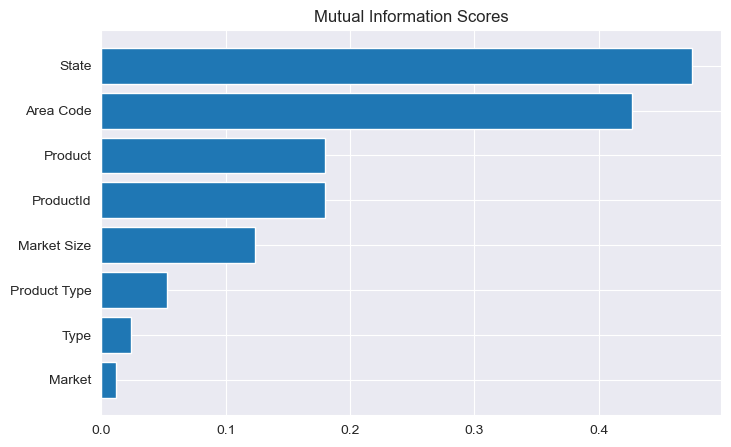

In [26]:
# Calculating and Plotting Discrete Features MI Scores
mi_scores_discrete_features = mutual_info_regression(X[X_discrete_features], y, discrete_features=discrete_features, random_state=2004)
mi_scores_discrete_features = pd.Series(mi_scores_discrete_features, name='MI Scores 1', index=X_discrete_features)
mi_scores_discrete_features = mi_scores_discrete_features.sort_values(ascending=False)

plt.figure(dpi=100, figsize=(8,5))
plot_mi_scores(mi_scores_discrete_features)

> Pada data dengan type integer, yang paling memiliki hubgan dengan profit adalah state dan posisi kedua adalah Area Code. sehingga dari sini dapat dilihat bahwa daeraha dan lokasi market sangatlah penting dari sisi profit.

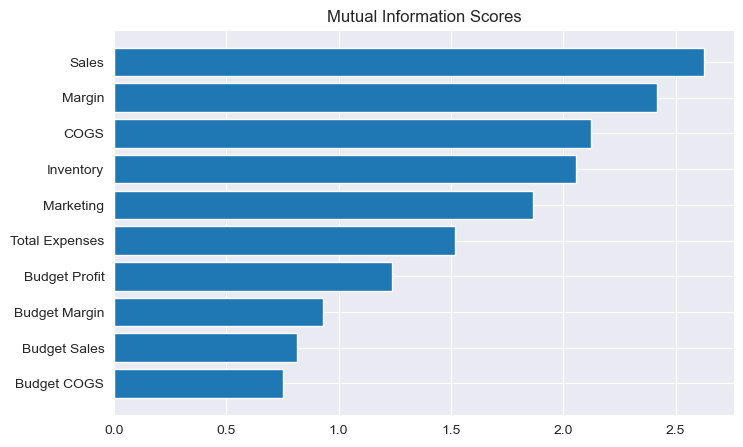

In [27]:
# Calculating and Plotting Continuous Features MI Scores
mi_scores_continuous_features = mutual_info_regression(X[X_continuous_features], y, discrete_features=continuous_features, random_state=2004)
mi_scores_continuous_features = pd.Series(mi_scores_continuous_features, name='MI Scores 1', index=X_continuous_features)
mi_scores_continuous_features = mi_scores_continuous_features.sort_values(ascending=False)

plt.figure(dpi=100, figsize=(8,5))
plot_mi_scores(mi_scores_continuous_features)

> Dapat dilihat pada data float, MI terbesar adalah pada sales dan kedua adalah margin dan COGS.

> `mutual relation tertinggi akan dijadikan prioritas pemilihan saat menggunakan VIF `

In [28]:
# Ini merupakan Data yang akan digunakan setelah dilakukan trial and error dari nilai mutual relation dan multikolinearitas (VIF)
Selected = ['Area Code','State', 'Market Size', 'Product','Total Expenses',  'Inventory',  'Sales' ]

In [29]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)


In [30]:
calc_vif(new_df[Selected])

,variables,VIF
1,State,7.665370
4,Total Expenses,7.542079
6,Sales,5.893345
0,Area Code,5.032519
3,Product,3.725552
5,Inventory,3.515844
2,Market Size,3.072017


>  Ini merupakan Data yang akan digunakan setelah dilakukan trial and error dari nilai mutual relation dan multikolinearitas (VIF)

In [31]:
df_new = new_df[Selected]
df_use = df[Selected]

---
# ⚙️Preprocessing

---

## Train Test Split

In [32]:
X = df_use
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
# ini merupakan data training X dan y train
training = pd.concat([X_train, y_train], axis=1)
training.shape

(2973, 8)

In [34]:
# ini merupakan data testing X dan y test 
testing = pd.concat([X_test, y_test], axis=1)
testing.shape

(1275, 8)

In [36]:
num_col = ['Area Code','Total Expenses','Inventory', 'Sales']
cat_col = [ 'State', 'Market Size','Product']

## Normality

In [37]:
stat, p = shapiro(training[num_col])
print('Shapiro-Wilk test statistic:', stat)
print('Shapiro-Wilk p-value:', p)

Shapiro-Wilk test statistic: 0.7291285991668701
Shapiro-Wilk p-value: 0.0


/Users/Devan/miniconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


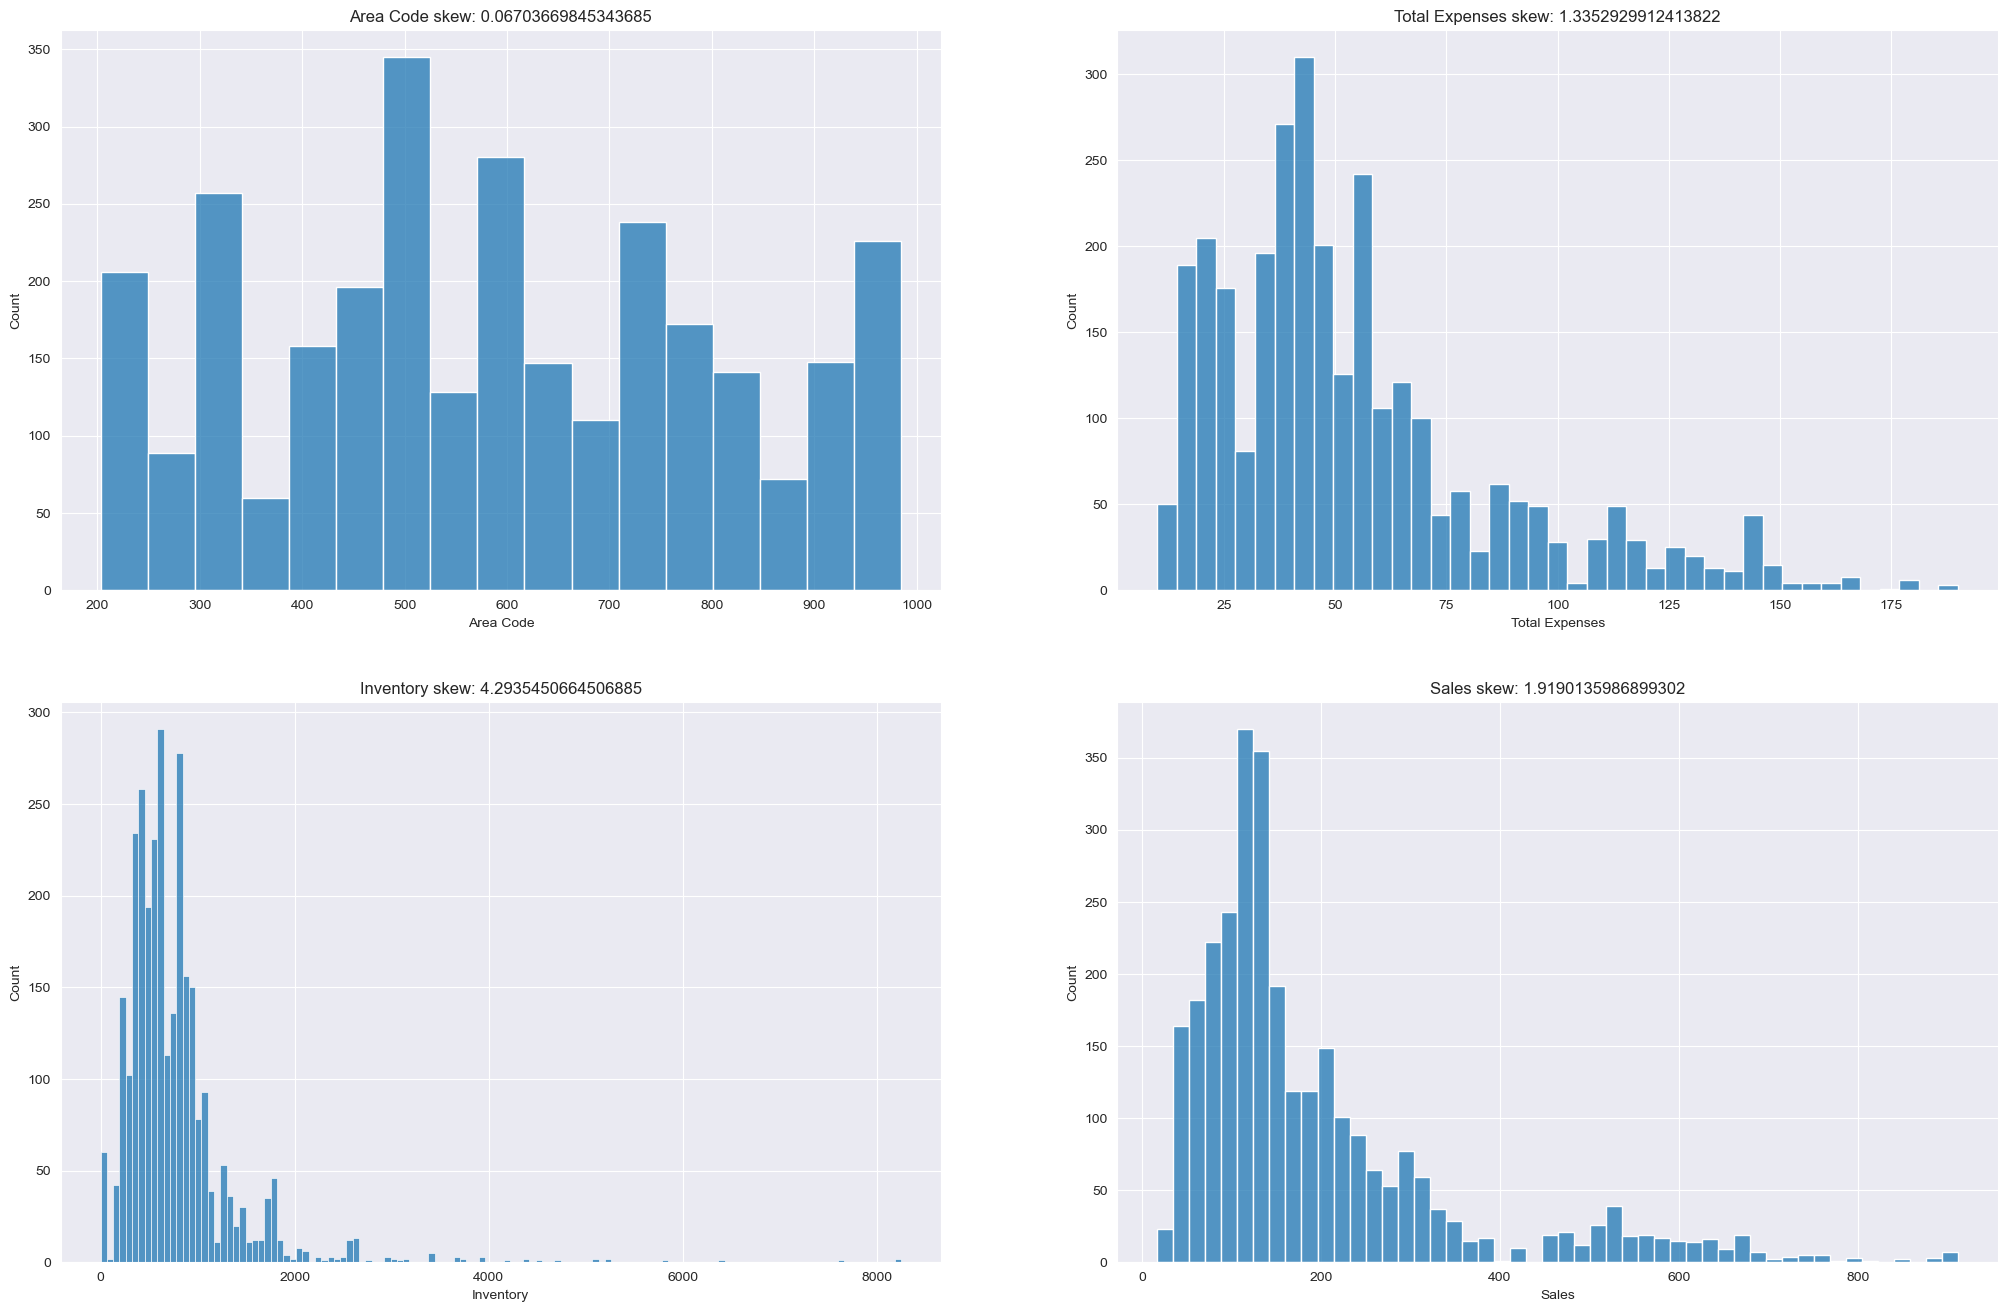

In [38]:
# Create the histogram plot
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=[25,16])
for idx, col in enumerate(num_col):
    sns.histplot(training[col], ax=ax[idx//2, idx%2])
    ax[idx//2, idx%2].set_title(f'{col} skew: {training[col].skew()}')
plt.show()

> Dilihat dari nilai shapiro bahwa data belum terdistribusi normal

> Dan jika dilihat dari nilai skew, data normal hanya pada area code.

## Handling Outlier

### Data are normally distributed

#### Area Code

In [39]:
Area_Code_out= training.copy()
Area_Code_out['Z-Score'] = stats.zscore(Area_Code_out['Area Code'])
Area_Code_out.head()

,Area Code,State,Market Size,Product,Total Expenses,Inventory,Sales,Profit,Z-Score
1948,541,Oregon,Small Market,Green Tea,53.0,666.0,230.0,81.0,-0.203380
3021,719,Colorado,Major Market,Green Tea,32.0,579.0,149.0,70.0,0.602359
264,234,Ohio,Major Market,Decaf Irish Cream,72.0,458.0,127.0,-3.0,-1.593053
385,262,Wisconsin,Small Market,Chamomile,33.0,380.0,103.0,40.0,-1.466307
3921,937,Ohio,Major Market,Chamomile,16.0,482.0,50.0,14.0,1.589163


In [40]:
Area_out =Area_Code_out.loc[Area_Code_out['Z-Score']> 3.00].sort_values(by='Z-Score', ascending=False)


print('percentage of outlier: ', Area_out.shape[0]/Area_Code_out.shape[0]*100, '%')

percentage of outlier:  0.0 %


`Tidak Ada Outliers`

## Data Tidak Normal

In [41]:
# calculate IQR and set upper and lower bounds for each column
cols = [ 'Total Expenses', 'Inventory', 'Sales']
outliers = {}
for col in cols:
    Q1 = df_use[col].quantile(0.25)
    Q3 = df_use[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 3*IQR
    lower = Q1 - 3*IQR ## digunakna 3 karena saat menggunakna nilai 1.5 jumlah outlier sangat extreme
    outliers[col] = df_use[(df_use[col] > upper) | (df_use[col] < lower)][col]

    # print the results
    print(f"Count of outliers in {col}: {outliers[col].shape[0]}")
    print(f"Percentage of outliers in {col}: {np.round(outliers[col].shape[0]/len(df_use[col])*100,2)}%")


Count of outliers in Total Expenses: 29
Percentage of outliers in Total Expenses: 0.68%
Count of outliers in Inventory: 94
Percentage of outliers in Inventory: 2.21%
Count of outliers in Sales: 120
Percentage of outliers in Sales: 2.82%


`Agar tidak ada data yang hilang, maka akan digunkana metode capping`

In [42]:
wins = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=cols)

training[cols] = wins.fit_transform(training[cols])

## spliting Training and Testing

`Karena handling outlier menggunakan data training, maka X dan y perlu dipisahkan kembali`

In [43]:
#training
X_train = training.drop('Profit', axis=1)
y_train = training['Profit']

# Testing
X_test = testing.drop('Profit', axis=1)
y_test = testing['Profit']

## Pendefinisian

In [44]:
# Scaler
numeric_features = ['Area Code', 'Total Expenses', 'Inventory', 'Sales']
numeric_transformer = MinMaxScaler()

# Encoder State
State = ['New Mexico', 'New Hampshire', 'Missouri', 'Louisiana', 'Connecticut', 'Utah', 'Oklahoma',  'Wisconsin', 'Nevada', 
         'Ohio', 'Washington', 'Florida', 'Oregon', 'Texas', 'Massachusetts', 'Colorado', 'New York', 'Iowa', 'Illinois', 'California']
categorical_feature_State = ['State']
categorical_transformer_State = OrdinalEncoder(categories=[State])

# Encoder Market Size
Market_Size = ['Small Market', 'Major Market']
categorical_feature_Market_Size = ['Market Size']
categorical_transformer_Market_Size = OrdinalEncoder(categories=[Market_Size])

# Encoder Product
Product = ['Green Tea', 'Amaretto', 'Mint', 'Regular Espresso', 'Caffe Latte', 'Decaf Irish Cream', 'Caffe Mocha', 
           'Earl Grey', 'Chamomile', 'Darjeeling', 'Decaf Espresso', 'Lemon', 'Columbian']
categorical_feature_Product = ['Product']
categorical_transformer_Product = OrdinalEncoder(categories=[Product])

In [45]:
# Mentranform dengan column transformer yang akan dijalankan dengan pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("scal", numeric_transformer, numeric_features),
        ("ord_State", categorical_transformer_State, categorical_feature_State),
        ("ord_Market_Size", categorical_transformer_Market_Size, categorical_feature_Market_Size),
        ("ord_Product", categorical_transformer_Product, categorical_feature_Product)
    ]
)

---

# 🎯 Modeling
---

## Pipeline

In [46]:
pip_linreg = Pipeline(
    steps=[("preprocessor", preprocessor), ("Linear Regression", LinearRegression())]
)

pip_knn = Pipeline(
    steps=[("preprocessor", preprocessor), ('KNN', KNeighborsRegressor())]
)

pip_rfr = Pipeline(
    steps=[("preprocessor", preprocessor), ("Random Forest", RandomForestRegressor())]
)

pip_XGB = Pipeline(
    steps=[("preprocessor", preprocessor), ("XGBoost", XGBRegressor())]
)

## Linear Regression

In [47]:
linreg_params = [{'Linear Regression__fit_intercept': [True, False]}]

# Create the grid search object
grid_search_linreg = GridSearchCV(pip_linreg, linreg_params, cv=5)

# Fit the grid search object to the training data
grid_search_linreg.fit(X_train, y_train)

# Print the best hyperparameters and test score
print("Best parameters: ", grid_search_linreg.best_params_)
print("Best score: ", grid_search_linreg.best_score_)

Best parameters:  {'Linear Regression__fit_intercept': True}
Best score:  0.871441249527722


> Dalam hasil tersebut, "Best parameters" adalah parameter terbaik yang ditemukan oleh proses optimisasi. Dalam hal ini, parameter yang terbaik adalah 'fit_intercept': True. Parameter ini menentukan apakah model akan memperhitungkan intercept (bias) atau tidak. Jika 'fit_intercept': True, maka model akan memperhitungkan intercept.

> Sedangkan, "Best score" adalah nilai skor terbaik yang dihasilkan oleh model Linear Regression dengan parameter terbaik yang telah ditemukan. Skor ini merepresentasikan seberapa baik model dapat memprediksi variabel target pada data yang telah diberikan. Dalam hal ini, skor terbaik yang diperoleh adalah 0.871441249527722, yang menunjukkan bahwa model dengan parameter 'fit_intercept': True dapat memprediksi variabel target dengan tingkat akurasi yang baik. Skor ini berada pada rentang 0 hingga 1, di mana semakin tinggi skornya, semakin baik pula kualitas model tersebut dalam memprediksi variabel target.

In [48]:
# Train and test Scores
print('Train Score: %.2f%%' % (grid_search_linreg.score(X_train, y_train) * 100))
print('Test Score: %.2f%%' % (grid_search_linreg.score(X_test, y_test) * 100))

Train Score: 87.31%
Test Score: 92.11%


In [49]:
cv_scores_linreg = grid_search_linreg.cv_results_['mean_test_score']
cv_std_linreg = grid_search_linreg.cv_results_['std_test_score']

print("mean_test_score: ", cv_scores_linreg.mean())
print("std_test_score: ", cv_std_linreg.mean())

mean_test_score:  0.8710500870839792
std_test_score:  0.021305865611062062


> Dapat kita perhatikan dari data CV_score ini, yang mana dari 5 percobaan memiliki rata-rata nilai recall sebesar 0.871 atau 87% yang mana rata-rata data dapat memprediksi variabel targer. dengan nilai rata-rata perbedaan atau standar deviasi nya hanya 2%. sehingga dapat dikatakan model ini benar memilki nilai score yang cukup baik walaupun masih bisa ditingkatkan lagi.

In [50]:
# get the best estimator from the grid search
best_linreg = grid_search_linreg.best_estimator_.named_steps['Linear Regression']

# get the coefficients of the logistic regression model
coef = best_linreg.coef_


# Print the Coef
for feature_name, coef_score in zip(X.columns, coef):
    print(f"{feature_name}: {coef_score}")

Area Code: -4.089422102351034
State: -272.71107780479497
Market Size: -111.69807476225493
Product: 560.5639827084665
Total Expenses: -0.4008847236025772
Inventory: 0.9321644538019708
Sales: 1.4236021440214826


> Dapat dilihat dari nilai Coef diatas ini, bahwa feature yang memiliki hubungan terbesar adalah product dengan besar 560.56 dan yang berhubungan negatif terbesar adalah state -272.711.

> Pada hasil tersebut dapat diambil interpretasi bahwa semakin banyak penjualan pada produk columbian maka akan semakin meningkat profit dan sedangkan jika semakin banyak store di california maka akan semakin menurun tingkat profitnya (hubungannya negatif)

> Dari sini dapat di beri kesimpulan jika ingin meningkatkan profit, harus fokus pada product dan lokasi penjualan karena kedua hal tersebut sangat berpengaruh.

> Sedangkan Sales tidak terlalu berpengaruh terhadap Profit.

In [51]:
# predict on the training data using the best model found by grid search
y_pred_train_linreg = grid_search_linreg.predict(X_train)

# predict on the test data using the best model found by grid search
y_pred_test_linreg = grid_search_linreg.predict(X_test)

In [53]:
print('train')
print('MAE', mean_absolute_error(y_pred_train_linreg, y_train))
print('MSE', mean_squared_error(y_pred_train_linreg, y_train))
print('RMSE', np.sqrt (mean_squared_error(y_pred_train_linreg, y_train)))
print('MAPE', mean_absolute_percentage_error(y_pred_train_linreg, y_train))
print('R2 Train', r2_score(y_pred_train_linreg, y_train))
print('')
print('test')
print('MAE', mean_absolute_error(y_pred_test_linreg, y_test))
print('MSE', mean_squared_error(y_pred_test_linreg, y_test))
print('RMSE', np.sqrt (mean_squared_error(y_pred_test_linreg, y_test)))
print('MAPE', mean_absolute_percentage_error(y_pred_test_linreg, y_test))
print('R2 Test', r2_score(y_pred_test_linreg, y_test))

train
MAE 20.792151322432627
MSE 1306.1153875141433
RMSE 36.140218420952344
MAPE 4.742245907566254
R2 Train 0.8546151934003144

test
MAE 19.298818100384803
MSE 825.6356428900474
RMSE 28.733876224589807
MAPE 3.378626918001147
R2 Test 0.9285820750097462


> Evaluasi di atas menggunakan algoritma Linier Regression pada dataset yang sama untuk training dan testing. Berikut adalah penjelasan dari masing-masing metrik evaluasi:

- MAE (Mean Absolute Error) adalah rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya. Semakin rendah nilai MAE, semakin baik kualitas prediksi model. Pada hasil evaluasi di atas, nilai MAE untuk training set adalah 20.79, sedangkan untuk testing set adalah 19.29. Hal ini menunjukkan bahwa model cenderung lebih akurat dalam memprediksi data training dibandingkan data testing.

- MSE (Mean Squared Error) adalah rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya. MSE memberikan bobot yang lebih besar pada error yang besar, sehingga model lebih sensitif terhadap outlier. Pada hasil evaluasi di atas, nilai MSE untuk training set adalah 1306.11, sedangkan untuk testing set adalah 825.63.

- RMSE (Root Mean Squared Error) adalah akar kuadrat dari MSE. RMSE sering digunakan karena lebih mudah diinterpretasikan dalam satuan yang sama dengan variabel target. Semakin rendah nilai RMSE, semakin baik kualitas prediksi model. Pada hasil evaluasi di atas, nilai RMSE untuk training set adalah 36.14, sedangkan untuk testing set adalah 28.73.

- MAPE (Mean Absolute Percentage Error) adalah rata-rata dari selisih persentase absolut antara nilai prediksi dan nilai sebenarnya. MAPE sering digunakan untuk mengevaluasi model di bidang keuangan dan bisnis. Semakin rendah nilai MAPE, semakin baik kualitas prediksi model. Pada hasil evaluasi di atas, nilai MAPE untuk training set adalah 4.74%, sedangkan untuk testing set adalah 3.37%.

- R-squared (R2) adalah ukuran seberapa baik variabel target dapat dijelaskan oleh variabel prediktor dalam model. R2 berkisar antara 0 dan 1, dimana semakin tinggi nilainya, semakin baik kualitas model. Pada hasil evaluasi di atas, nilai R2 untuk training set adalah 0.854, sedangkan untuk testing set adalah 0.928. Hal ini menunjukkan bahwa model dapat menjelaskan 92.8% variabilitas data testing, dan sebesar 85.4% variabilitas data training.


`Data Underfit`

## KNN

In [54]:
knn_params = [{'KNN__n_neighbors': [3, 5, 7, 9], 
              'KNN__weights': ['uniform', 'distance'], 
              'KNN__p': [1, 2]}]

# Create the grid search object
grid_search_knn = GridSearchCV(pip_knn, knn_params, cv=5)

# Fit the grid search object to the training data
grid_search_knn.fit(X_train, y_train)

# Print the best hyperparameters and test score
print("Best parameters: ", grid_search_knn.best_params_)
print("Best score: ", grid_search_knn.best_score_)

Best parameters:  {'KNN__n_neighbors': 5, 'KNN__p': 1, 'KNN__weights': 'uniform'}
Best score:  0.9124189617494736


> Dalam hasil tersebut, "Best parameters" adalah parameter terbaik yang ditemukan oleh proses optimisasi. Ada lima parameter yang ditemukan, yaitu:
- 'KNN__n_neighbors': 5 menunjukkan jumlah tetangga terdekat yang dipilih sebagai parameter terbaik. Pada kasus ini, jumlah tetangga optimal adalah 5.
- 'KNN__p': 1 menunjukkan jenis metrik jarak yang digunakan untuk mengukur jarak antar titik data. Pada kasus ini, jenis metrik jarak yang digunakan adalah Manhattan distance atau jarak L1, yang menghitung jarak horizontal dan vertikal antara dua titik data.
- 'KNN__weights': 'uniform' menunjukkan jenis pembobotan yang digunakan untuk menghitung nilai prediksi. Dalam hal ini, setiap tetangga memiliki bobot yang sama terhadap prediksi akhir. Ada juga jenis pembobotan lain seperti 'distance', yang akan menambahkan bobot yang lebih besar pada tetangga terdekat.


> Baris Best score menunjukkan performa model KNN dengan hiperparameter terbaik, diukur dengan metrik performa yang dipilih, pada data pelatihan dengan menggunakan validasi silang (cross-validation). Pada kasus ini, skornya adalah 0,9124, yang menunjukkan bahwa model KNN dengan hiperparameter yang dipilih memberikan hasil yang baik pada data pelatihan.

In [55]:
cv_scores_knn = grid_search_knn.cv_results_['mean_test_score']
cv_std_knn = grid_search_knn.cv_results_['std_test_score']

print("mean_test_score: ", cv_scores_knn.mean())
print("std_test_score: ", cv_std_knn.mean())

mean_test_score:  0.9050600505895454
std_test_score:  0.013421792354934113


> Dapat kita perhatikan dari data CV_score ini, yang mana dari 5 percobaan memiliki rata-rata nilai recall sebesar 0.905 atau 90% yang mana rata-rata data dapat memprediksi variabel targer. dengan nilai rata-rata perbedaan atau standar deviasi nya hanya 1.3%. sehingga dapat dikatakan model ini benar memilki nilai score yang cukup baik walaupun masih bisa ditingkatkan lagi.

In [59]:
# Train and Validation Scores
print('Train Score: %.2f%%' % (grid_search_knn.score(X_train, y_train) * 100))
print('Test Score: %.2f%%' % (grid_search_knn.score(X_test, y_test) * 100))

Train Score: 94.57%
Test Score: 93.02%


In [60]:
# predict on the training data using the best model found by grid search
y_pred_train_knn = grid_search_knn.predict(X_train)

# predict on the test data using the best model found by grid search
y_pred_test_knn = grid_search_knn.predict(X_test)

In [61]:
print('train')
print('MAE', mean_absolute_error(y_pred_train_knn, y_train))
print('MSE', mean_squared_error(y_pred_train_knn, y_train))
print('RMSE', np.sqrt (mean_squared_error(y_pred_train_knn, y_train)))
print('MAPE', mean_absolute_percentage_error(y_pred_train_knn, y_train))
print('R2 Train', r2_score(y_pred_train_knn, y_train))
print('')
print('test')
print('MAE', mean_absolute_error(y_pred_test_knn, y_test))
print('MSE', mean_squared_error(y_pred_test_knn, y_test))
print('RMSE', np.sqrt (mean_squared_error(y_pred_test_knn, y_test)))
print('MAPE', mean_absolute_percentage_error(y_pred_test_knn, y_test))
print('R2 Test', r2_score(y_pred_test_knn, y_test))

train
MAE 13.907904473595694
MSE 558.679246552304
RMSE 23.636396649072886
MAPE 13633500385582.008
R2 Train 0.9423518572717485

test
MAE 16.765176470588234
MSE 730.3114039215686
RMSE 27.024274345883345
MAPE 0.4406133556041801
R2 Test 0.9252198624210735


> Evaluasi di atas menggunakan algoritma Random Forest pada dataset yang sama untuk training dan testing. Berikut adalah penjelasan dari masing-masing metrik evaluasi:

- MAE (Mean Absolute Error) adalah rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya. Semakin rendah nilai MAE, semakin baik kualitas prediksi model. Pada hasil evaluasi di atas, nilai MAE untuk training set adalah 13.90, sedangkan untuk testing set adalah 16.76. Hal ini menunjukkan bahwa model cenderung lebih akurat dalam memprediksi data training dibandingkan data testing.

- MSE (Mean Squared Error) adalah rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya. MSE memberikan bobot yang lebih besar pada error yang besar, sehingga model lebih sensitif terhadap outlier. Pada hasil evaluasi di atas, nilai MSE untuk training set adalah 558.67, sedangkan untuk testing set adalah 27.02.

- RMSE (Root Mean Squared Error) adalah akar kuadrat dari MSE. RMSE sering digunakan karena lebih mudah diinterpretasikan dalam satuan yang sama dengan variabel target. Semakin rendah nilai RMSE, semakin baik kualitas prediksi model. Pada hasil evaluasi di atas, nilai RMSE untuk training set adalah 23.63, sedangkan untuk testing set adalah 28.39.

- MAPE (Mean Absolute Percentage Error) adalah rata-rata dari selisih persentase absolut antara nilai prediksi dan nilai sebenarnya. MAPE sering digunakan untuk mengevaluasi model di bidang keuangan dan bisnis. Semakin rendah nilai MAPE, semakin baik kualitas prediksi model. Pada hasil evaluasi di atas, nilai MAPE untuk training set adalah 13633500385582.008%, sedangkan untuk testing set adalah 0.440%.

- R-squared (R2) adalah ukuran seberapa baik variabel target dapat dijelaskan oleh variabel prediktor dalam model. R2 berkisar antara 0 dan 1, dimana semakin tinggi nilainya, semakin baik kualitas model. Pada hasil evaluasi di atas, nilai R2 untuk training set adalah 0.942, sedangkan untuk testing set adalah 0.925. Hal ini menunjukkan bahwa model dapat menjelaskan 94.2% variabilitas data testing, dan sebesar 92.5% variabilitas data training.


`Data Overfit`

## Random Forest Regressor

In [62]:
rfr_params = [{
    'Random Forest__n_estimators': [100, 200, 300],
    'Random Forest__max_depth': [3, 5, 7],
    'Random Forest__min_samples_split': [2, 4, 6],
    'Random Forest__min_samples_leaf': [1, 2, 4],
    'Random Forest__max_features': ['sqrt', 'log2']
}]

# Create the grid search object
grid_search_rfr = GridSearchCV(pip_rfr, rfr_params, cv=5)

# Fit the grid search object to the training data
grid_search_rfr.fit(X_train, y_train)

# Print the best hyperparameters and test score
print("Best parameters: ", grid_search_rfr.best_params_)
print("Best score: ", grid_search_rfr.best_score_)

Best parameters:  {'Random Forest__max_depth': 7, 'Random Forest__max_features': 'log2', 'Random Forest__min_samples_leaf': 1, 'Random Forest__min_samples_split': 2, 'Random Forest__n_estimators': 100}
Best score:  0.9163396602823747


> Dalam hasil tersebut, "Best parameters" adalah parameter terbaik yang ditemukan oleh proses optimisasi. Ada lima parameter yang ditemukan, yaitu:
- max_depth: menentukan kedalaman maksimum dari setiap pohon pada model
- max_features: menentukan jumlah fitur yang dipertimbangkan pada setiap split dalam setiap pohon
- min_samples_leaf: menentukan jumlah sampel minimum yang dibutuhkan untuk menjadi leaf node (simpul daun)
- min_samples_split: menentukan jumlah sampel minimum yang dibutuhkan untuk membagi sebuah node
- n_estimators: menentukan jumlah pohon yang akan dibuat pada model

> Dalam hasil tersebut, parameter terbaik yang ditemukan adalah:
- max_depth: 7
- max_features: 'sqrt'
- min_samples_leaf: 1
- min_samples_split: 4
- n_estimators: 200

> Sedangkan, "Best score" adalah nilai skor terbaik yang dihasilkan oleh model Random Forest dengan parameter terbaik yang telah ditemukan. Skor ini merepresentasikan seberapa baik model dapat memprediksi variabel target pada data yang telah diberikan. Dalam hal ini, skor terbaik yang diperoleh adalah 0.9146726007772183, yang menunjukkan bahwa model dengan parameter terbaik tersebut dapat memprediksi variabel target dengan tingkat akurasi yang sangat baik. Skor ini berada pada rentang 0 hingga 1, di mana semakin tinggi skornya, semakin baik pula kualitas model tersebut dalam memprediksi variabel target.

In [63]:
cv_scores_rfr = grid_search_rfr.cv_results_['mean_test_score']
cv_std_rfr = grid_search_rfr.cv_results_['std_test_score']

print("mean_test_score: ", cv_scores_rfr.mean())
print("std_test_score: ", cv_std_rfr.mean())

mean_test_score:  0.8353432004071679
std_test_score:  0.01575348998179633


> Dapat kita perhatikan dari data CV_score ini, yang mana dari 5 percobaan memiliki rata-rata nilai recall sebesar 0.835 atau 83% yang mana rata-rata data dapat memprediksi variabel targer. dengan nilai rata-rata perbedaan atau standar deviasi nya hanya 1%. sehingga dapat dikatakan model ini benar memilki nilai score yang cukup baik walaupun masih bisa ditingkatkan lagi.

In [64]:
# coefficients Random Forest model

# Get the best estimator from the grid search
best_rfr = grid_search_rfr.best_estimator_

# Get the feature importances
feature_importances = best_rfr.named_steps['Random Forest'].feature_importances_

# Print the feature importances
for feature_name, importance_score in zip(X.columns, feature_importances):
    print(f"{feature_name}: {importance_score}")

Area Code: 0.016166725462465253
State: 0.12482195480110839
Market Size: 0.16581429588748645
Product: 0.48844604016725895
Total Expenses: 0.07896096977677489
Inventory: 0.022677199477961717
Sales: 0.1031128144269443


> Dapat dilihat dari nilai Future Importance, bahwa feature yang memiliki hubungan terbesar adalah product dengan besar 0.49 dan Market Size 0.16.

> Dari sini dapat di beri kesimpulan jika ingin meningkatkan profit, harus fokus pada product dan ukuran market karena kedua hal tersebut sangat berpengaruh.

> Sedangkan Sales tidak terlalu berpengaruh terhadap Profit.

In [65]:
# Train and Validation Scores
print('Train Score: %.2f%%' % (grid_search_rfr.score(X_train, y_train) * 100))
print('Test Score: %.2f%%' % (grid_search_rfr.score(X_test, y_test) * 100))

Train Score: 94.73%
Test Score: 91.73%


In [66]:
# predict on the training data using the best model found by grid search
y_pred_train_rfr = grid_search_rfr.predict(X_train)

# predict on the test data using the best model found by grid search
y_pred_test_rfr = grid_search_rfr.predict(X_test)

In [67]:
print('train')
print('MAE', mean_absolute_error(y_pred_train_rfr, y_train))
print('MSE', mean_squared_error(y_pred_train_rfr, y_train))
print('RMSE', np.sqrt (mean_squared_error(y_pred_train_rfr, y_train)))
print('MAPE', mean_absolute_percentage_error(y_pred_train_rfr, y_train))
print('R2 Train', r2_score(y_pred_train_rfr, y_train))
print('')
print('test')
print('MAE', mean_absolute_error(y_pred_test_rfr, y_test))
print('MSE', mean_squared_error(y_pred_test_rfr, y_test))
print('RMSE', np.sqrt (mean_squared_error(y_pred_test_rfr, y_test)))
print('MAPE', mean_absolute_percentage_error(y_pred_test_rfr, y_test))
print('R2 Test', r2_score(y_pred_test_rfr, y_test))

train
MAE 16.37534037877535
MSE 542.7664089847775
RMSE 23.297347681330113
MAPE 1.1614812972757553
R2 Train 0.9365081443756051

test
MAE 19.221458009704193
MSE 865.2880044617758
RMSE 29.415778154959217
MAPE 0.6311166046721144
R2 Test 0.8938265290360106


> Evaluasi di atas menggunakan algoritma Random Forest pada dataset yang sama untuk training dan testing. Berikut adalah penjelasan dari masing-masing metrik evaluasi:

- MAE (Mean Absolute Error) adalah rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya. Semakin rendah nilai MAE, semakin baik kualitas prediksi model. Pada hasil evaluasi di atas, nilai MAE untuk training set adalah 16.09, sedangkan untuk testing set adalah 18.63. Hal ini menunjukkan bahwa model cenderung lebih akurat dalam memprediksi data training dibandingkan data testing.

- MSE (Mean Squared Error) adalah rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya. MSE memberikan bobot yang lebih besar pada error yang besar, sehingga model lebih sensitif terhadap outlier. Pada hasil evaluasi di atas, nilai MSE untuk training set adalah 534.91, sedangkan untuk testing set adalah 806.050.

- RMSE (Root Mean Squared Error) adalah akar kuadrat dari MSE. RMSE sering digunakan karena lebih mudah diinterpretasikan dalam satuan yang sama dengan variabel target. Semakin rendah nilai RMSE, semakin baik kualitas prediksi model. Pada hasil evaluasi di atas, nilai RMSE untuk training set adalah 23.12, sedangkan untuk testing set adalah 28.39.

- MAPE (Mean Absolute Percentage Error) adalah rata-rata dari selisih persentase absolut antara nilai prediksi dan nilai sebenarnya. MAPE sering digunakan untuk mengevaluasi model di bidang keuangan dan bisnis. Semakin rendah nilai MAPE, semakin baik kualitas prediksi model. Pada hasil evaluasi di atas, nilai MAPE untuk training set adalah 0.87%, sedangkan untuk testing set adalah 0.90%.

- R-squared (R2) adalah ukuran seberapa baik variabel target dapat dijelaskan oleh variabel prediktor dalam model. R2 berkisar antara 0 dan 1, dimana semakin tinggi nilainya, semakin baik kualitas model. Pada hasil evaluasi di atas, nilai R2 untuk training set adalah 0.937, sedangkan untuk testing set adalah 0.902. Hal ini menunjukkan bahwa model dapat menjelaskan 90.2% variabilitas data testing, dan sebesar 93.7% variabilitas data training.


`Data Overfit`

## XGBoost

In [68]:
XGB_params = {'XGBoost__learning_rate': [0.01, 0.1, 0.3],
              'XGBoost__max_depth': [3, 5, 7],
              'XGBoost__n_estimators': [50, 100, 150],
              'XGBoost__subsample': [0.5, 0.7, 1],
              'XGBoost__colsample_bytree': [0.5, 0.7, 1]}

# create the grid search object
grid_search_XGB = GridSearchCV(pip_XGB, XGB_params , cv=5)

# fit the grid search object to the training data
grid_search_XGB.fit(X_train, y_train)

# print the best hyperparameters and test score
print("Best parameters: ", grid_search_XGB.best_params_)
print("Best score: ", grid_search_XGB.best_score_)

Best parameters:  {'XGBoost__colsample_bytree': 1, 'XGBoost__learning_rate': 0.1, 'XGBoost__max_depth': 7, 'XGBoost__n_estimators': 100, 'XGBoost__subsample': 1}
Best score:  0.9473674021991849


> Dalam hasil tersebut, "Best parameters" adalah parameter terbaik yang ditemukan oleh proses optimisasi. Ada lima parameter yang ditemukan, yaitu:
- learning_rate: menentukan seberapa besar pembelajaran pada setiap iterasi
- max_depth: menentukan kedalaman maksimum dari setiap pohon pada model
- n_estimators: menentukan jumlah pohon yang akan dibuat pada model
- subsample: menentukan persentase dari sampel yang digunakan untuk setiap pohon
- colsample_bytree: menentukan persentase dari fitur yang digunakan untuk setiap pohon

> Dalam hasil tersebut, parameter terbaik yang ditemukan adalah:
- learning_rate: 0.1
- max_depth: 7
- n_estimators: 100
- subsample: 1
- colsample_bytree: 1

> Sedangkan, "Best score" adalah nilai skor terbaik yang dihasilkan oleh model XGBoost dengan parameter terbaik yang telah ditemukan. Skor ini merepresentasikan seberapa baik model dapat memprediksi variabel target pada data yang telah diberikan. Dalam hal ini, skor terbaik yang diperoleh adalah 0.9473674021991849, yang menunjukkan bahwa model dengan parameter terbaik tersebut dapat memprediksi variabel target dengan tingkat akurasi yang sangat baik. Skor ini berada pada rentang 0 hingga 1, di mana semakin tinggi skornya, semakin baik pula kualitas model tersebut dalam memprediksi variabel target.

In [69]:
cv_scores_XGB = grid_search_XGB.cv_results_['mean_test_score']
cv_std_XGB = grid_search_XGB.cv_results_['std_test_score']

print("mean_test_score: ", cv_scores_XGB.mean())
print("std_test_score: ", cv_std_XGB.mean())

mean_test_score:  0.8196953663241592
std_test_score:  0.012035291548826767


> Dapat kita perhatikan dari data CV_score ini, yang mana dari 5 percobaan memiliki rata-rata nilai recall sebesar 0.819 atau 81% yang mana rata-rata data dapat memprediksi variabel target. dengan nilai rata-rata perbedaan atau standar deviasi nya hanya 1%. sehingga dapat dikatakan model ini benar memilki nilai score yang cukup baik walaupun masih bisa ditingkatkan lagi.

In [70]:
# coefficients Random Forest model

# Get the best estimator from the grid search
best_XGB = grid_search_XGB.best_estimator_

# Get the feature importances
feature_importances = best_XGB.named_steps['XGBoost'].feature_importances_

# Print the feature importances
for feature_name, importance_score in zip(X.columns, feature_importances):
    print(f"{feature_name}: {importance_score}")

Area Code: 0.005841040518134832
State: 0.07754997164011002
Market Size: 0.37270551919937134
Product: 0.48153242468833923
Total Expenses: 0.03482344001531601
Inventory: 0.01871516928076744
Sales: 0.008832423947751522


> Dapat dilihat dari nilai Future Importance, bahwa feature yang memiliki hubungan terbesar adalah product dengan besar 0.48 dan Market size 0.37.

> Dari sini dapat di beri kesimpulan jika ingin meningkatkan profit, harus fokus pada product dan market size penjualan karena kedua hal tersebut sangat berpengaruh.

> Sedangkan Sales tidak terlalu berpengaruh terhadap Profit.

In [71]:
# Train and Validation Scores
print('Train Score: %.2f%%' % (grid_search_XGB.score(X_train, y_train) * 100))
print('Test Score: %.2f%%' % (grid_search_XGB.score(X_test, y_test) * 100))

Train Score: 99.52%
Test Score: 96.12%


In [72]:
# predict on the training data using the best model found by grid search
y_pred_train_XGB = grid_search_XGB.predict(X_train)

# predict on the test data using the best model found by grid search
y_pred_test_XGB = grid_search_XGB.predict(X_test)

In [73]:
print('train')
print('MAE', mean_absolute_error(y_pred_train_XGB, y_train))
print('MSE', mean_squared_error(y_pred_train_XGB, y_train))
print('RMSE', np.sqrt (mean_squared_error(y_pred_train_XGB, y_train)))
print('MAPE', mean_absolute_percentage_error(y_pred_train_XGB, y_train))
print('R2 Train', r2_score(y_pred_train_XGB, y_train))
print('')
print('test')
print('MAE', mean_absolute_error(y_pred_test_XGB, y_test))
print('MSE', mean_squared_error(y_pred_test_XGB, y_test))
print('RMSE', np.sqrt (mean_squared_error(y_pred_test_XGB, y_test)))
print('MAPE', mean_absolute_percentage_error(y_pred_test_XGB, y_test))
print('R2 Test', r2_score(y_pred_test_XGB, y_test))

train
MAE 4.572917022366262
MSE 48.968115231991035
RMSE 6.997722145955142
MAPE 0.29613666949081197
R2 Train 0.9951657191558542

test
MAE 9.366189832687377
MSE 406.0846734948056
RMSE 20.15154270756474
MAPE 0.39927753195747817
R2 Test 0.9591353469813528


Evaluasi di atas menggunakan algoritma XGBoost pada dataset yang sama untuk training dan testing. Berikut adalah penjelasan dari masing-masing metrik evaluasi:

- MAE (Mean Absolute Error) adalah rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya. Semakin rendah nilai MAE, semakin baik kualitas prediksi model. Pada hasil evaluasi di atas, nilai MAE untuk training set adalah 4.57, sedangkan untuk testing set adalah 9.36. Hal ini menunjukkan bahwa model cenderung lebih akurat dalam memprediksi data training dibandingkan data testing.

- MSE (Mean Squared Error) adalah rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya. MSE memberikan bobot yang lebih besar pada error yang besar, sehingga model lebih sensitif terhadap outlier. Pada hasil evaluasi di atas, nilai MSE untuk training set adalah 48.97, sedangkan untuk testing set adalah 406.08.

- RMSE (Root Mean Squared Error) adalah akar kuadrat dari MSE. RMSE sering digunakan karena lebih mudah diinterpretasikan dalam satuan yang sama dengan variabel target. Semakin rendah nilai RMSE, semakin baik kualitas prediksi model. Pada hasil evaluasi di atas, nilai RMSE untuk training set adalah 6.99, sedangkan untuk testing set adalah 20.15.

- MAPE (Mean Absolute Percentage Error) adalah rata-rata dari selisih persentase absolut antara nilai prediksi dan nilai sebenarnya. MAPE sering digunakan untuk mengevaluasi model di bidang keuangan dan bisnis. Semakin rendah nilai MAPE, semakin baik kualitas prediksi model. Pada hasil evaluasi di atas, nilai MAPE untuk training set adalah 0.30%, sedangkan untuk testing set adalah 0.40%.

- R-squared (R2) adalah ukuran seberapa baik variabel target dapat dijelaskan oleh variabel prediktor dalam model. R2 berkisar antara 0 dan 1, dimana semakin tinggi nilainya, semakin baik kualitas model. Pada hasil evaluasi di atas, nilai R2 untuk training set adalah 0.995, sedangkan untuk testing set adalah 0.959. Hal ini menunjukkan bahwa model dapat menjelaskan 95.9% variabilitas data testing, dan sebesar 99.5% variabilitas data training.

`Data Overfit`

## Comparison

In [74]:
print('test linreg')
print('MAE', mean_absolute_error(y_pred_test_linreg, y_test))
print('MSE', mean_squared_error(y_pred_test_linreg, y_test))
print('RMSE', np.sqrt (mean_squared_error(y_pred_test_linreg, y_test)))
print('MAPE', mean_absolute_percentage_error(y_pred_test_linreg, y_test))
print('R2 Test', r2_score(y_pred_test_linreg, y_test))
print('')
print('test KNN')
print('MAE', mean_absolute_error(y_pred_test_knn, y_test))
print('MSE', mean_squared_error(y_pred_test_knn, y_test))
print('RMSE', np.sqrt (mean_squared_error(y_pred_test_knn, y_test)))
print('MAPE', mean_absolute_percentage_error(y_pred_test_knn, y_test))
print('R2 Test', r2_score(y_pred_test_knn, y_test))
print('')
print('test Random Forest')
print('MAE', mean_absolute_error(y_pred_test_rfr, y_test))
print('MSE', mean_squared_error(y_pred_test_rfr, y_test))
print('RMSE', np.sqrt (mean_squared_error(y_pred_test_rfr, y_test)))
print('MAPE', mean_absolute_percentage_error(y_pred_test_rfr, y_test))
print('R2 Test', r2_score(y_pred_test_rfr, y_test))
print('')
print('test XGBoost')
print('MAE', mean_absolute_error(y_pred_test_XGB, y_test))
print('MSE', mean_squared_error(y_pred_test_XGB, y_test))
print('RMSE', np.sqrt (mean_squared_error(y_pred_test_XGB, y_test)))
print('MAPE', mean_absolute_percentage_error(y_pred_test_XGB, y_test))
print('R2 Test', r2_score(y_pred_test_XGB, y_test))


test linreg
MAE 19.298818100384803
MSE 825.6356428900474
RMSE 28.733876224589807
MAPE 3.378626918001147
R2 Test 0.9285820750097462

test KNN
MAE 16.765176470588234
MSE 730.3114039215686
RMSE 27.024274345883345
MAPE 0.4406133556041801
R2 Test 0.9252198624210735

test Random Forest
MAE 19.221458009704193
MSE 865.2880044617758
RMSE 29.415778154959217
MAPE 0.6311166046721144
R2 Test 0.8938265290360106

test XGBoost
MAE 9.366189832687377
MSE 406.0846734948056
RMSE 20.15154270756474
MAPE 0.39927753195747817
R2 Test 0.9591353469813528


Conclusion:
Dari ketiga model evaluasi yang dihasilkan, terdapat perbedaan dalam nilai-nilai setiap matrix evaluasi. Berikut adalah penjelasan masing-masing matrix evaluasi:

1. Mean Absolute Error (MAE): Mengukur rata-rata absolut selisih antara nilai aktual dengan nilai prediksi. Semakin kecil nilai MAE, semakin baik kinerja model.

    - Pada model linreg, nilai MAE sebesar 19.2988.
    - Pada model KNN, nilai MAE sebesar 16.7651.
    - Pada model Random Forest, nilai MAE sebesar 19.1414.
    - Pada model XGBoost, nilai MAE sebesar 9.3662.

`Berdasarkan nilai MAE yang dihasilkan, model XGBoost merupakan model yang paling baik karena memiliki nilai MAE yang paling kecil.`

2. Mean Squared Error (MSE): Mengukur rata-rata selisih kuadrat antara nilai aktual dengan nilai prediksi. Semakin kecil nilai MSE, semakin baik kinerja model.

    - Pada model linreg, nilai MSE sebesar 825.6356.
    - Pada model KNN, nilai MSE sebesar 730.311.
    - Pada model Random Forest, nilai MSE sebesar 836.8079.
    - Pada model XGBoost, nilai MSE sebesar 406.0847.

`Berdasarkan nilai MSE yang dihasilkan, model XGBoost merupakan model yang paling baik karena memiliki nilai MSE yang paling kecil.`

3. Root Mean Squared Error (RMSE): Mengukur akar rata-rata selisih kuadrat antara nilai aktual dengan nilai prediksi. Semakin kecil nilai RMSE, semakin baik kinerja model.

    - Pada model linreg, nilai RMSE sebesar 28.7339.
    - Pada model KNN, nilai RMSE sebesar 27.02.
    - Pada model Random Forest, nilai RMSE sebesar 28.9276.
    - Pada model XGBoost, nilai RMSE sebesar 20.1515.

`Berdasarkan nilai RMSE yang dihasilkan, model XGBoost merupakan model yang paling baik karena memiliki nilai RMSE yang paling kecil.`

4. Mean Absolute Percentage Error (MAPE): Mengukur rata-rata persentase selisih absolut antara nilai aktual dengan nilai prediksi. Semakin kecil nilai MAPE, semakin baik kinerja model.

    - Pada model linreg, nilai MAPE sebesar 3.3786%.
    - Pada model KNN, nilai MAPE sebesar 0.440%.
    - Pada model Random Forest, nilai MAPE sebesar 0.631%.
    - Pada model XGBoost, nilai MAPE sebesar 0.3993%.

`Berdasarkan nilai MAPE yang dihasilkan, model XGBoost merupakan model yang paling baik karena memiliki nilai MAPE yang paling kecil.`

5. R-Squared Score (R2): Mengukur seberapa baik model dapat menjelaskan variasi dalam data. Nilai R2 berkisar antara 0 hingga 1, dimana semakin dekat dengan 1, semakin baik kinerja model.

    - Pada model linreg, nilai R2 sebesar 0.9286.
    - Pada model linreg, nilai R2 sebesar 0.925.
    - Pada model Random Forest, nilai R2 sebesar 0.8995.
    - Pada model XGBoost, nilai R2 sebesar 0.9591.

`Berdasarkan nilai R2 yang dihasilkan, model XGBoost merupakan model yang paling baik karena memiliki nilai R2 yang paling besar.`

Model Pilihan:

`XGBoost: Karena nilai MAE,MSE,RMSE yang lebih kecil daripada yang lain dan nilai R2 yang paling besar dari pada yang lain`

---

# 💾 Model Saving

---

In [75]:
with open('model_XGB_GridSearchCV.pkl', 'wb') as file_1:
    joblib.dump(grid_search_XGB, file_1)

with open('Selected_features.txt', 'wb') as file_2:
    joblib.dump(Selected, file_2)

----

# 📝 Conclusion Problem

> Dari Hasil Modeling diatas, akan digunakan model XGBoost karena memiliki tingkat error dan pengaruh yang paling baik dibanding lainnya. 
> Dapat diperhatiakan untuk Hasil Feature Importance :
- Area Code: 0.005841040518134832
- State: 0.07754997164011002
- Market Size: 0.37270551919937134
- Product: 0.48153242468833923
- Total Expenses: 0.03482344001531601
- Inventory: 0.01871516928076744
- Sales: 0.008832423947751522

> dapat dilihat yang memiliki `pengaruh terbesar adalah Product dan Market Size` yang mana pengaruhnya jika dijumlahkan lebih besar dari 5 feature lainya. namun Sales bukanlah yang berpengaruh melainkan diantara yang lain `pengaruh tekecil adalah Sales`.

> Jika pada saat ini Store ingin meningkatkan profitability, jangan fokus pada bagaimana sales itu meningkat karena terkadang sales meningkat karena promo, sehingga saat sales meningkat namun profit tidaklah meningkat. Oleh karena itu jika ingin perusahaan aman secara financial, perlu dilakukan peningkatan profitability dengan fokus pada Product dan Market Size yang major jika ingin meningkatkan profitnya.

> Dalam hukum Ekonomi, Profit = Total Revenue - Total Expense  
    Jika diperhatikan dari rumusnya dan dibandingkan dengan feature importance, dapat dilihat bahwa Total Ravenue store terlihat cukup besar karena Total Expanse hingga tidak terlalu berpengaruh terhadap profit yang mana mengindikasikan jumlah Total Ravenue yang jauh lebih besar. 

> Fokus Perusahaan jika ingin meningkatkan profit dengan signifikan adalah dengan `Product dan Market Size`.

---